# **PROJECT :HATE SPEECH DETECTION** #



PROBLEM STATEMENT:Hate speech refers to any form of verbal, written, or behavioral communication that attacks or uses derogatory or discriminatory language against individuals or groups based on characteristics such as religion, ethnicity, nationality, race, gender, or other identity factors. In this project, we will build a hate speech detection model using machine learning techniques in Python.

Hate speech detection is essentially a sentiment classification task. To train a model capable of identifying hate speech from text, we will use a dataset typically employed for sentiment analysis. For this specific task, we will utilize Twitter data to detect tweets that contain hate speech.

#Part 1: Import Twitter Hate Speech Data and Analyze#

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from nltk.tokenize import word_tokenize
import nltk
from collections import Counter
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
!pip install transformers==4.18.0 sentencepiece
!pip install datasets==1.17.0

from datasets import load_dataset, load_metric, DatasetDict, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from tokenizers import BertWordPieceTokenizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import recall_score, precision_score, f1_score
import os
import warnings

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 31.7 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.3/306.3 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir("/content/drive/MyDrive")
df = pd.read_csv("train_E6oV3lV.csv")

In [ ]:
df.head()

,id,label,tweet,tokenized_tweet,tweet_length
0,1,0,user father dysfunct selfish drag kid dysfunct...,"[user, father, dysfunct, selfish, drag, kid, d...",50
1,2,0,user user thank lyft credit cant use caus dont...,"[user, user, thank, lyft, credit, cant, use, c...",90
2,3,0,bihday majesti,"[bihday, majesti]",14
3,4,0,model love u take u time,"[model, love, u, take, u, time]",24
4,5,0,factsguid societi motiv,"[factsguid, societi, motiv]",23


In [ ]:
test_data= pd.read_csv("test_tweets_anuFYb8.csv")

In [ ]:
test_data.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


## INFORMATIONS ABOUT THE DATA##

In [ ]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 31962
Number of Features: 5


In [ ]:
df.columns

Index(['id', 'label', 'tweet', 'tokenized_tweet', 'tweet_length'], dtype='object')

In [ ]:
df.dtypes

,0
id,int64
label,int64
tweet,object
tokenized_tweet,object
tweet_length,int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               31962 non-null  int64 
 1   label            31962 non-null  int64 
 2   tweet            31962 non-null  object
 3   tokenized_tweet  31962 non-null  object
 4   tweet_length     31962 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ MB


In [ ]:
df.size

159810

### Checking for null values###

In [ ]:
df.isnull().sum()

,0
id,0
label,0
tweet,0
tokenized_tweet,0
tweet_length,0


###Extracting the Target Attribute for Each Class and Visualize###

Hate Speech: 2242
Free Speech: 29720


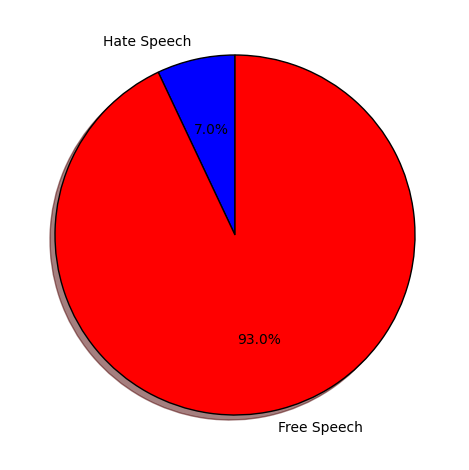

In [ ]:
# Count the number of instances for each class in the 'label' column
hate_speech_count = df[df['label'] == 1].shape[0]
free_speech_count = df[df['label'] == 0].shape[0]
print('Hate Speech:', hate_speech_count)
print('Free Speech:', free_speech_count)

# Prepare data for pie chart visualization
speech_counts = [hate_speech_count, free_speech_count]
labels = ["Hate Speech", "Free Speech"]

# Create a pie chart to visualize the distribution of classes
plt.pie(speech_counts, labels=labels, shadow=True, wedgeprops={'edgecolor': 'black'},
        autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])

plt.tight_layout()
plt.show()

#Part 2: Data Preprocessing#

In this section, we focused on data preprocessing. We began by cleaning the text using Regular Expressions, followed by tokenizing the sentences into individual words. Next, we removed stopwords such as "the", "a", and "at", and applied stemming to reduce words to their root forms. Afterward, we used the TF-IDF model for feature extraction, selecting the 2,000 most frequent words from the corpus. Finally, we split the dataset into training and testing sets, with an 80% training and 20% testing ratio.

CLEANING THE DATA

In [ ]:
import string
import re

# Convert text to lowercase
def convert_to_lowercase(text):
    return text.lower()

# Strip punctuation from text
def strip_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Remove URLs from text
def eliminate_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)

# Remove Twitter handles (e.g., @username) from text
def eliminate_handles(text):
    return re.sub(r'@\w+', '', text)

# Remove special characters, keeping only alphanumeric characters
def clean_special_characters(text):
    return " ".join(word for word in text.split() if word.isalnum())

# Apply text processing functions to the 'tweet' column of the DataFrame
df['tweet'] = df['tweet'].apply(convert_to_lowercase)
df['tweet'] = df['tweet'].apply(strip_punctuation)
df['tweet'] = df['tweet'].apply(eliminate_urls)
df['tweet'] = df['tweet'].apply(eliminate_handles)
df['tweet'] = df['tweet'].apply(clean_special_characters)



In [ ]:
test_data['tweet'] = test_data['tweet'].apply(convert_to_lowercase)
test_data['tweet'] = test_data['tweet'].apply(strip_punctuation)
test_data['tweet'] = test_data['tweet'].apply(eliminate_urls)
test_data['tweet'] = test_data['tweet'].apply(eliminate_handles)
test_data['tweet'] = test_data['tweet'].apply(clean_special_characters)

###REMOVING STOPWORDS###

In [ ]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
def rem_stop_words_stem(text):
  words = text.split()
  processed_words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]
  return ' '.join(processed_words)

df['tweet'] = df['tweet'].apply(rem_stop_words_stem)
test_data['tweet'] = test_data['tweet'].apply(rem_stop_words_stem)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#BAG OF WORDS#
Converts text into fixed-length vectors by counting the frequency of each word in the text, without considering the order or context of the words.

In [ ]:
vec = CountVectorizer()

train_bow = vec.fit_transform(df['tweet'])
test_bow = vec.transform(test_data['tweet'])
train_bow_shape = train_bow.shape
print('BOW featurized train data shape : ',train_bow_shape)
test_bow_shape = test_bow.shape
print('BOW featurized test data shape : ',test_bow_shape)

BOW featurized train data shape :  (31962, 33762)
BOW featurized test data shape :  (17197, 33762)


#Term Frequency-Inverse Document Frequency (TF-IDF)#
Enhances the BoW model by weighting each word's frequency in a document against its frequency across all documents, emphasizing unique words that are more informative.

In [ ]:
tfidf_vec = TfidfVectorizer()

train_tfidf = tfidf_vec.fit_transform(df['tweet'])
test_tfidf = tfidf_vec.transform(test_data['tweet'])
train_tfidf_shape = train_tfidf.shape
print('TF-IDF featurized train data shape : ',train_tfidf_shape)
test_tfidf_shape = test_tfidf.shape
print('TF-IDF featurized test data shape : ',test_tfidf_shape)

TF-IDF featurized train data shape :  (31962, 33762)
TF-IDF featurized test data shape :  (17197, 33762)


#Word2Vec#
Represents words as continuous vectors in a high-dimensional space, capturing semantic meaning by training on word co-occurrence patterns, allowing for context-aware embeddings.

In [ ]:
df['tokenized_tweet'] = df['tweet'].apply(word_tokenize)
test_data['tokenized_tweet'] = test_data['tweet'].apply(word_tokenize)
model = gensim.models.Word2Vec(sentences=df['tokenized_tweet'], vector_size=100, window=5, min_count=1, workers=4)

model.save("word2vec.model")
def get_average_word2vec(tokens_list, model, vector_size):
    """
    Calculate the average word2vec for each document.
    """
    if len(tokens_list) < 1:
        return np.zeros(vector_size)
    vec = [model.wv[word] for word in tokens_list if word in model.wv]
    return np.mean(vec, axis=0) if len(vec) > 0 else np.zeros(vector_size)
vector_size = 100
train_vectors = np.array([get_average_word2vec(tokens, model, vector_size) for tokens in df['tokenized_tweet']])
test_vectors = np.array([get_average_word2vec(tokens, model, vector_size) for tokens in test_data['tokenized_tweet']])
train_vectors_shape = train_vectors.shape
print('Word2Vec featurized train data shape : ',train_vectors_shape)
test_vectors_shape = test_vectors.shape
print('Word2Vec featurized test data shape : ',test_vectors_shape)

Word2Vec featurized train data shape :  (31962, 100)
Word2Vec featurized test data shape :  (17197, 100)


#EDA#

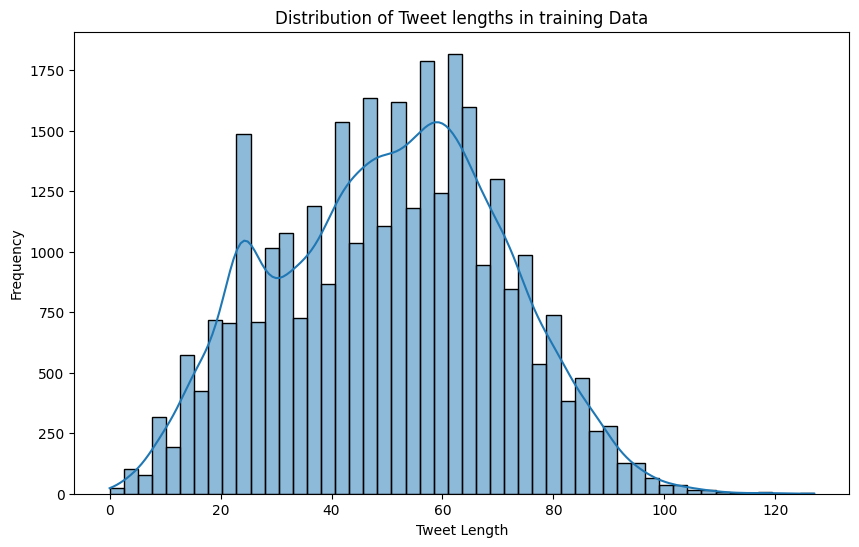

In [ ]:
df['tweet_length'] = df['tweet'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['tweet_length'], bins=50, kde=True)
plt.title("Distribution of Tweet lengths in training Data")
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

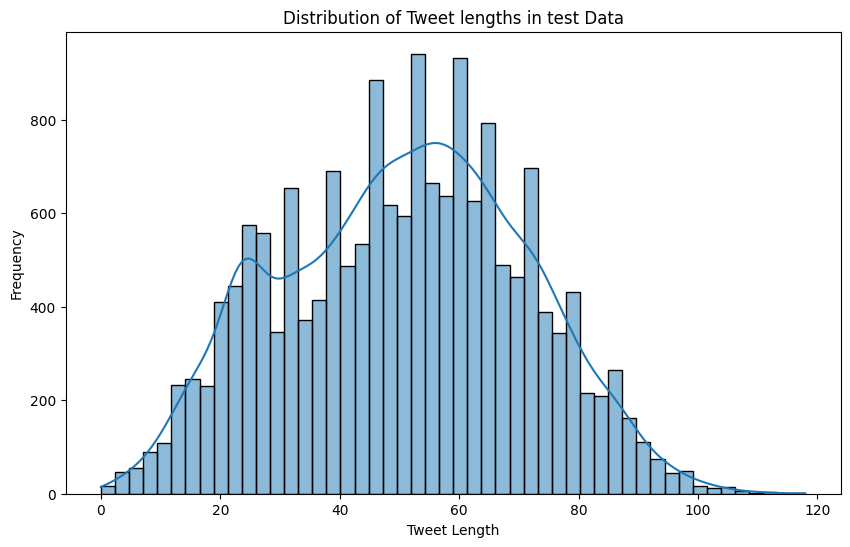

In [ ]:
test_data['tweet_length'] = test_data['tweet'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(test_data['tweet_length'], bins=50, kde=True)
plt.title("Distribution of Tweet lengths in test Data")
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

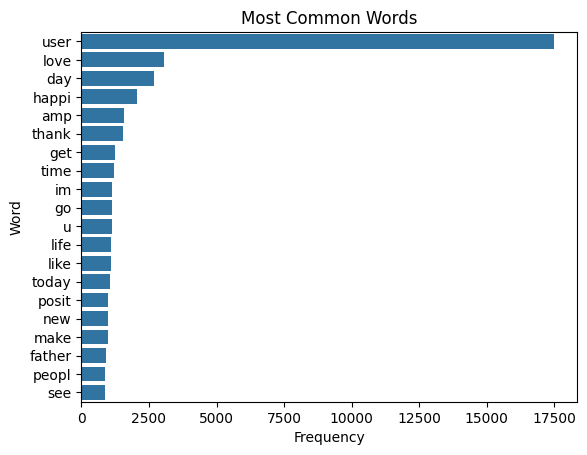

In [ ]:
all_words = ' '.join([text for text in df['tweet']])
word_freq = Counter(all_words.split())
common_words = word_freq.most_common(20)

common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
sns.barplot(x='Frequency', y='Word', data=common_words_df)
plt.title('Most Common Words')
plt.show()

###WORD CLOUD###

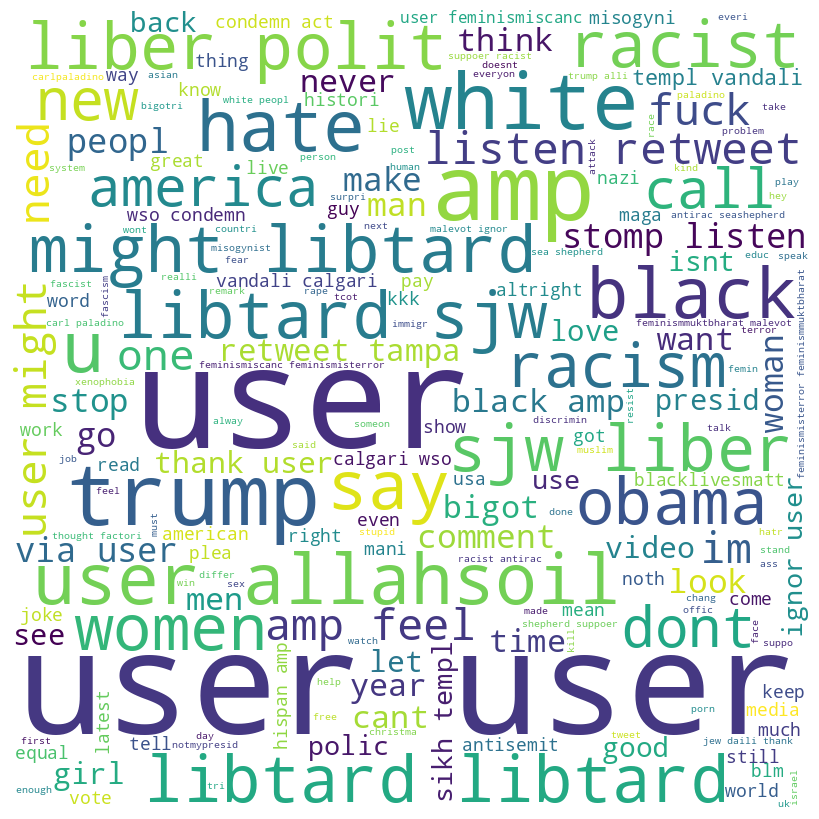

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Filter the DataFrame for rows labeled as hate speech
hate_speech = df[df['label'] == 1]
comment_words = ''
stopwords = set(STOPWORDS)

# Iterate through each tweet in the filtered hate speech data
for val in hate_speech['tweet']:

    # Convert the tweet to a string if it's not already one
    val = str(val)

    # Split the tweet into individual words (tokens)
    tokens = val.split()

    # Convert each word to lowercase
    tokens = [word.lower() for word in tokens]

    # Combine the tokens back into a single string and append to comment_words
    comment_words += " ".join(tokens) + " "

# Generate a WordCloud using the collected hate speech words
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

# Display the generated WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")  # Hide the axes
plt.tight_layout(pad=0)

plt.show()


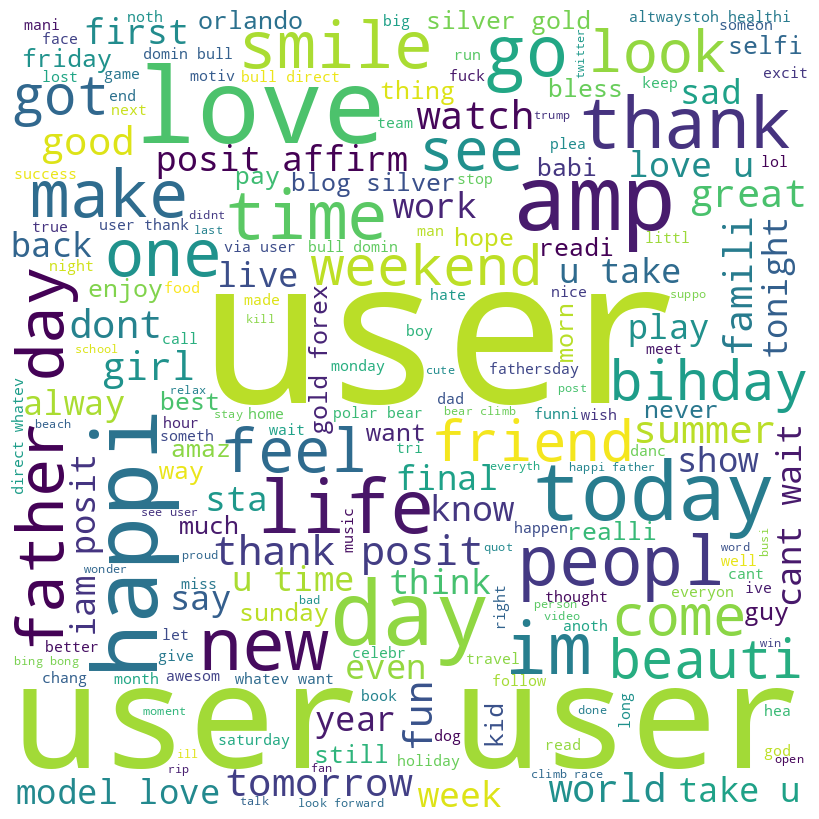

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Filter for tweets labeled as free speech
free_speech_tweets = df[df['label'] == 0]

# Initialize an empty string for combining all tweet text
combined_words = ''
stopwords_set = STOPWORDS

# Process each tweet in the free speech dataset
for tweet in free_speech_tweets['tweet']:

    # Ensure the tweet is a string and split into individual words
    words = str(tweet).split()

    # Convert all words to lowercase and append to the combined string
    combined_words += " ".join([word.lower() for word in words]) + " "

# Generate the WordCloud with the combined free speech words
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords_set,
                      min_font_size=10).generate(combined_words)

# Display the WordCloud using matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axes
plt.tight_layout(pad=0)

plt.show()


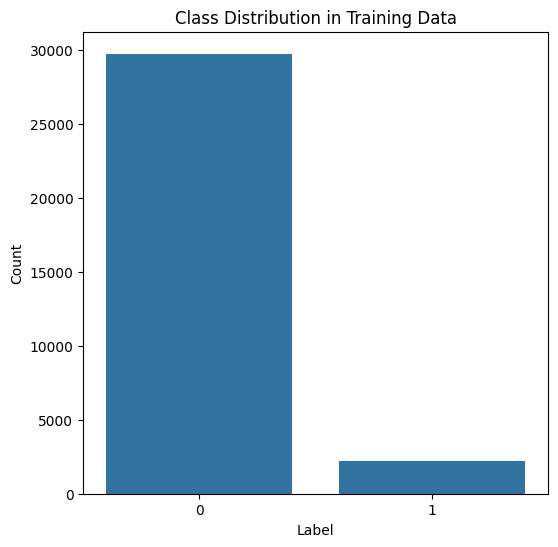

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='label', data=df)
plt.title('Class Distribution in Training Data')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

#Data Balancing#

In [ ]:
# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['tweet'])
y = df['label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_train_balanced))

Original class distribution: Counter({0: 23783, 1: 1786})
Resampled class distribution: Counter({1: 23783, 0: 23783})


#ML MODELS#

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline as ImbPipeline  # Use imbalanced-learn pipeline to handle SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(df['tweet'], df['label'], test_size=0.2, random_state=42)

# Create a pipeline with SMOTE, TF-IDF Vectorizer, and a placeholder classifier
pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer()),   # Apply TF-IDF on raw text
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE after TF-IDF transformation
    ('classifier', LogisticRegression())  # Placeholder classifier to be replaced
])

# Set the parameter grid to try different classifiers and hyperparameters
param_grid = [
    {
        'classifier': [LogisticRegression()],
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l2']
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [None, 10, 20]
    },
    {
        'classifier': [GradientBoostingClassifier()],
        'classifier__n_estimators': [50, 100],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    }
]

# Perform a grid search to find the best model and hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and the best estimator
print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

# Use the best model to predict on the validation set
y_pred = grid_search.predict(X_val)

# Display classification report
print(classification_report(y_val, y_pred))




Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters: {'classifier': RandomForestClassifier(), 'classifier__max_depth': None, 'classifier__n_estimators': 50}
Best Estimator: Pipeline(steps=[('tfidf', TfidfVectorizer()), ('smote', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier(n_estimators=50))])
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5937
           1       0.78      0.60      0.68       456

    accuracy                           0.96      6393
   macro avg       0.87      0.79      0.83      6393
weighted avg       0.96      0.96      0.96      6393



In [ ]:
print(confusion_matrix(y_val, y_pred))

[[5858   79]
 [ 182  274]]


In [ ]:
test_data['prediction'] = grid_search.predict(test_data['tweet'])

In [ ]:
test_data.head()

,id,tweet,tokenized_tweet,tweet_length,prediction
0,31963,studiolif aislif requir passion dedic willpow ...,"[studiolif, aislif, requir, passion, dedic, wi...",50,0
1,31964,user white supremacist want everyon see new movi,"[user, white, supremacist, want, everyon, see,...",48,0
2,31965,safe way heal acn altwaystoh healthi heal,"[safe, way, heal, acn, altwaystoh, healthi, heal]",41,0
3,31966,hp curs child book reserv alreadi ye harrypott...,"[hp, curs, child, book, reserv, alreadi, ye, h...",64,0
4,31967,3rd bihday amaz hilari nephew eli ahmir uncl d...,"[3rd, bihday, amaz, hilari, nephew, eli, ahmir...",54,0


#Transformers Model#

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:349: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map_location="cp

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
model = model.to('cuda')
X = list(df['tweet'])
y = list(df['label'])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_tokenized = tokenizer(X_train, padding = True, truncation = True, max_length=512)
X_val_tokenized = tokenizer(X_val, padding = True, truncation = True, max_length=512)

In [ ]:
X_train_tokenized.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
print(X_train_tokenized['input_ids'][0])

[101, 5310, 5310, 5310, 4921, 2063, 3477, 2012, 6528, 2102, 2627, 2095, 2620, 2095, 2002, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
class Dataset(torch.utils.data.Dataset):
  def __init__(self, encodings, labels=None):
    self.encodings = encodings
    self.labels = labels

  def __getitem__(self, idx):
    item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    if self.labels:
      item['labels'] = torch.tensor(self.labels[idx])
    return item

  def __len__(self):
    return len(self.encodings['input_ids'])

In [ ]:
train_dataset = Dataset(X_train_tokenized, y_train)
val_dataset = Dataset(X_val_tokenized, y_val)

In [ ]:
def compute_metrics(p):
    print(type(p))
    pred, labels = p
    pred = np.argmax(pred, axis=1)
    accuracy = np.mean(pred == labels)
    recall = recall_score(labels, pred)
    precision = precision_score(labels, pred)
    f1 = f1_score(labels, pred)
    return {'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1': f1}

In [ ]:
args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=2,
    per_device_train_batch_size=8
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 25569
  Num Epochs = 1
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 3197


Step,Training Loss
500,0.250000
1000,0.209700
1500,0.182100
2000,0.186100
2500,0.159400
3000,0.153500


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2000
Configuration saved in ./results/checkpoint-2000/config.json
Model weights saved in ./results/checkpoint-2000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2500
Configuration saved in ./results/checkpoint-2500/config.json
Model weights saved in ./results/checkpoint-2500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-3000
Configuration saved in ./results/checkpoint-3

TrainOutput(global_step=3197, training_loss=0.1872234917223957, metrics={'train_runtime': 625.0358, 'train_samples_per_second': 40.908, 'train_steps_per_second': 5.115, 'total_flos': 604422621927720.0, 'train_loss': 0.1872234917223957, 'epoch': 1.0})

In [ ]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 6393
  Batch size = 8


<class 'transformers.trainer_utils.EvalPrediction'>


{'eval_loss': 0.16563697159290314,
 'eval_accuracy': 0.9582355701548568,
 'eval_recall': 0.5241228070175439,
 'eval_precision': 0.8269896193771626,
 'eval_f1': 0.6416107382550336,
 'eval_runtime': 17.2865,
 'eval_samples_per_second': 369.825,
 'eval_steps_per_second': 46.279,
 'epoch': 1.0}

In [ ]:
text = "I hate you"
inputs = tokenizer(text, padding = True, truncation = True, return_tensors='pt').to('cuda')
outputs = model(**inputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
predictions = predictions.cpu().detach().numpy()


In [ ]:
predicted_class = predictions.argmax(axis=-1)
print(predicted_class)

[0]
